<a href="https://colab.research.google.com/github/abhishek09827/RJPOLICE_HACK_680_Sangyan_07/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Firstly load the data and do the preprocessing of it.

In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/Frauddataset.csv")
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0,0


In [4]:
pip install inflection


In [5]:
# Renaming the old names of columns to a readable name for better understanding and readibility

import inflection
cols_old = df1.columns.tolist()

snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))

df1.columns= cols_new
df1.columns

Index(['step', 'type', 'amount', 'name_orig', 'oldbalance_org',
       'newbalance_orig', 'name_dest', 'oldbalance_dest', 'newbalance_dest',
       'is_fraud', 'is_flagged_fraud'],
      dtype='object')

In [6]:
df1.head()

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0,0


In [7]:
#Check how many rows and cols dataset have

print('Number of Rows : {}'. format(df1.shape[0]))
print('Number of cols : {}'. format(df1.shape[1]))

Number of Rows : 636262
Number of cols : 11


In [8]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   step              636262 non-null  int64  
 1   type              636262 non-null  object 
 2   amount            636262 non-null  float64
 3   name_orig         636262 non-null  object 
 4   oldbalance_org    636262 non-null  float64
 5   newbalance_orig   636262 non-null  float64
 6   name_dest         636262 non-null  object 
 7   oldbalance_dest   636262 non-null  float64
 8   newbalance_dest   636262 non-null  float64
 9   is_fraud          636262 non-null  int64  
 10  is_flagged_fraud  636262 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 53.4+ MB


# Data types of each cols is fine, like they are not inaccurate


In [9]:
#Chech if there is any null value
df1.isna()

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
636257,False,False,False,False,False,False,False,False,False,False,False
636258,False,False,False,False,False,False,False,False,False,False,False
636259,False,False,False,False,False,False,False,False,False,False,False
636260,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df1.isna().mean()

step                0.0
type                0.0
amount              0.0
name_orig           0.0
oldbalance_org      0.0
newbalance_orig     0.0
name_dest           0.0
oldbalance_dest     0.0
newbalance_dest     0.0
is_fraud            0.0
is_flagged_fraud    0.0
dtype: float64

In [12]:
# There is no Nah Value to fill

In [13]:
# In the cols 'is_fraud' & 'is_flagged_feraud' are in 0,1 if we do that in yes or no it will be helpful

In [11]:
df1['is_fraud']= df1['is_fraud'].map({1: 'yes', 0 : 'no'})
df1['is_flagged_fraud'] = df1['is_flagged_fraud'].map({1: 'yes', 0: 'no'})

In [12]:
df1.head()

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,no,no
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,no,no
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,no,no
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,no,no
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,no,no


In [16]:
# Have to check the stats of all the numeric values so lets seperate the numeric values and the char in dataset (integer_value and object value)


In [13]:
num_attributes = df1.select_dtypes(exclude ='object')
cat_attributes = df1.select_dtypes(include ='object')


In [14]:
describe = num_attributes.describe().T

describe['range'] = (num_attributes.max() - num_attributes.min()).tolist()
describe['variation coefficient'] = (num_attributes.std() / num_attributes.mean()).tolist()
describe['skew'] = num_attributes.skew().tolist()
describe['kurtosis'] = num_attributes.kurtosis().tolist()

describe

,count,mean,std,min,25%,50%,75%,max,range,variation coefficient,skew,kurtosis
step,636262.0,2.429319e+02,1.423309e+02,1.0,155.000,238.000,3.340000e+02,7.420000e+02,7.410000e+02,0.585888,0.375052,0.324437
amount,636262.0,1.800585e+05,6.069714e+05,0.0,13407.425,74815.770,2.084988e+05,5.722962e+07,5.722962e+07,3.370967,29.577107,1546.661043
oldbalance_org,636262.0,8.317937e+05,2.885636e+06,0.0,0.000,14239.000,1.072998e+05,4.368662e+07,4.368662e+07,3.469173,5.243428,32.766036
newbalance_orig,636262.0,8.528354e+05,2.921296e+06,0.0,0.000,0.000,1.435652e+05,4.367380e+07,4.367380e+07,3.425393,5.173614,31.932547
oldbalance_dest,636262.0,1.096212e+06,3.375389e+06,0.0,0.000,131539.745,9.384820e+05,3.551855e+08,3.551855e+08,3.079138,20.622388,1074.335293
newbalance_dest,636262.0,1.221809e+06,3.656213e+06,0.0,0.000,214712.725,1.109230e+06,3.555534e+08,3.555534e+08,2.992460,19.623903,928.694204


In [19]:
# Categorical attributes

In [15]:
cat_attributes.describe()

,type,name_orig,name_dest,is_fraud,is_flagged_fraud
count,636262,636262,636262,636262,636262
unique,5,636171,457224,2,2
top,CASH_OUT,C334643493,C2083562754,no,no
freq,224216,2,14,635441,636260


In [21]:
# Key points from above

#The majority type is cash_out with 2237500.

#There's a lot of variability in name_orig, so it could be hard to use one hot encoding.

#There's less name_orig than name_dest. There's more users sending than receiving, however use one hot encoding will not help.

#There's more fraud than the flagged fraud, it shows that the current method can't recognize fraud efficiently.

In [16]:
df1.head()

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,no,no
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,no,no
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,no,no
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,no,no
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,no,no


# Starting off with feature Engineering ----> Dividing the cols into for informative cols with FE based on the hypothesis


In [110]:
df1['is_fraud'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
df2= df1.copy()

In [18]:
# FE on step
df2['step_days']= df2['step'].apply(lambda i : i/24)
df2['step_weeks']= df2['step'].apply(lambda i : i/(24*7))

#difference between initial balance before the transaction and new balance after the transaction

df2['diff_new_old_balance']= df2['newbalance_dest']- df2['oldbalance_dest']

# difference between initial balance recipient before the transaction and new balance recipient after the transaction.

df2['diff_new_old_destiny'] = df2['newbalance_dest'] - df2['oldbalance_dest']

# name orig and name dest
df2['name_orig'] = df2['name_orig'].apply(lambda i: i[0])
df2['name_dest'] = df2['name_dest'].apply(lambda i: i[0])

In [19]:
df3 = df2.copy()

In [20]:
df4 = df3.copy()

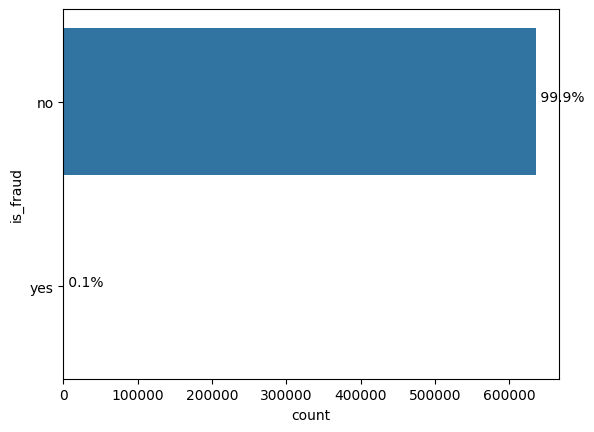

In [21]:
#Response Variabe

ax = sns.countplot(y='is_fraud', data=df4);

total = df4['is_fraud'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

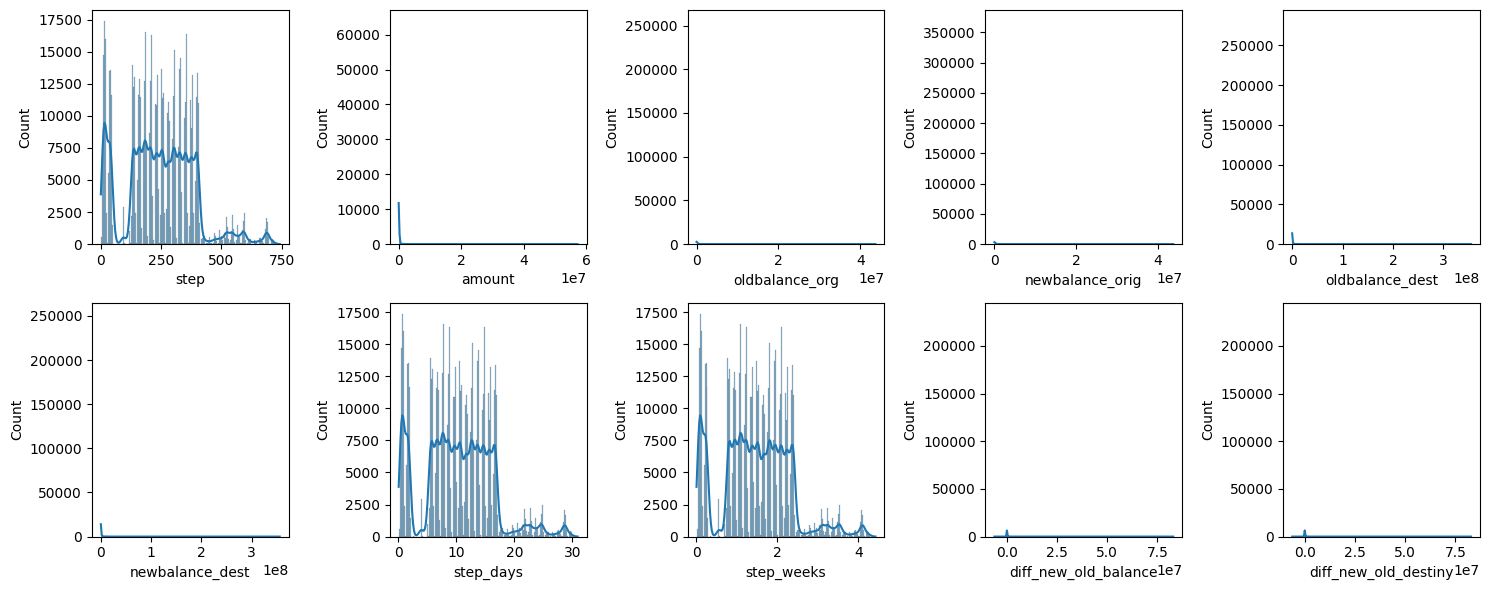

In [22]:

num_attributes = df4.select_dtypes(exclude='object')
columns = num_attributes.columns.tolist()

# Create subplots for each numerical attribute
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Flatten the axes array to loop through subplots
axes = axes.flatten()
for i, column in enumerate(columns):
    sns.histplot(num_attributes[column], ax=axes[i], kde=True)
plt.tight_layout()
plt.show()


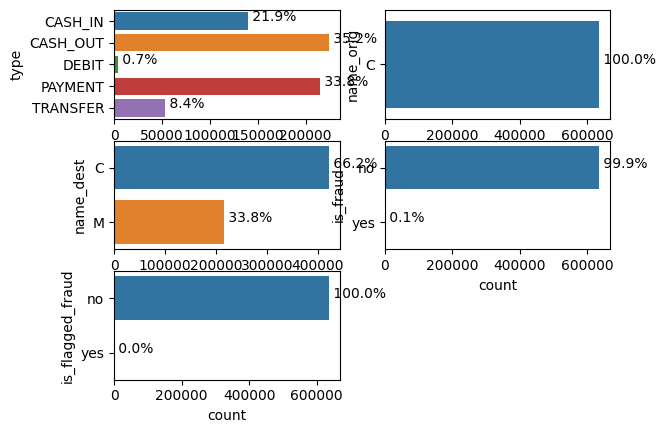

In [23]:
cat_attributes = df4.select_dtypes(include='object')
columns = cat_attributes.columns.tolist()
j = 1

for column in columns:
    plt.subplot(3, 2, j)
    ax = sns.countplot(y=column, data=cat_attributes)

    total = cat_attributes[column].size
    for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

    j += 1


H1 The majority fraud transiction occours for the same user.
TRUE: The same user origem and destiny has got the same inital letter.

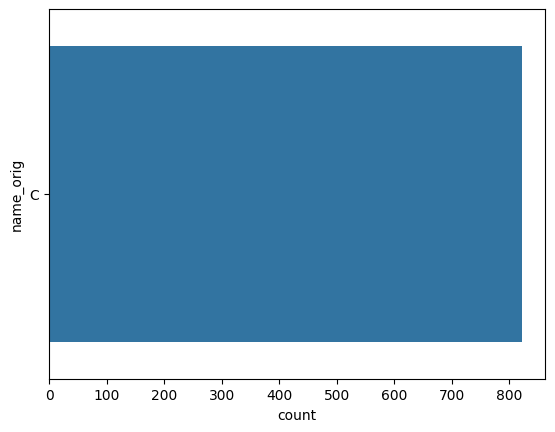

In [24]:
aux1 = df4[df4['is_fraud'] == 'yes'] # Filter the DataFrame for fraud entries

sns.countplot(y='name_orig', data=aux1)
plt.show()


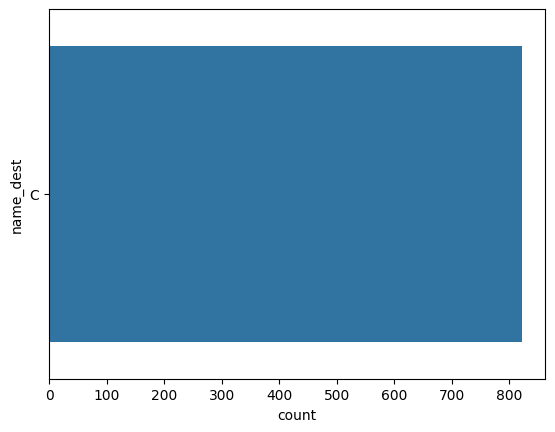

In [25]:
sns.countplot(y='name_dest', data=aux1);

H2 All the fraud amount is greater than 10.000.
TRUE: The values are greater than 10.000. But it's important to note that the no-fraud values is greater than 100.000 also.

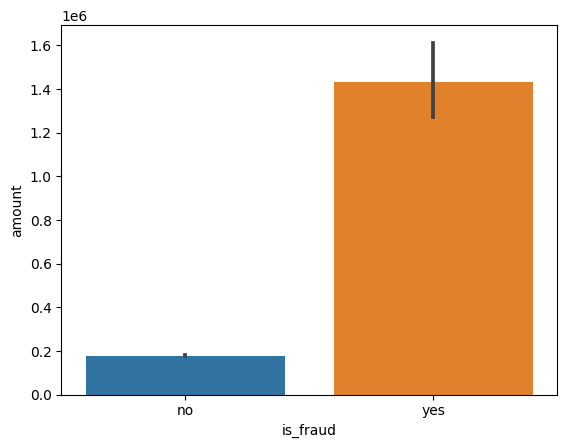

In [26]:
sns.barplot(y='amount', x='is_fraud', data=df4);

# H3 60% of fraud transaction occours using cash-out-type method.
FALSE: The fraud transaction occours in transfer and cash-out type. However they're almost the same value.

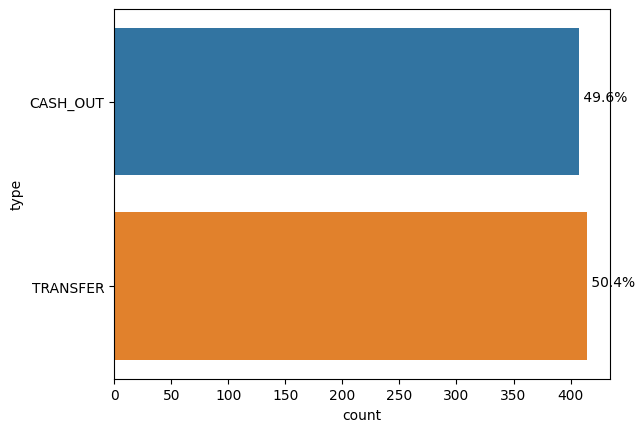

In [27]:
aux1 = df4[df4['is_fraud'] == 'yes']
ax = sns.countplot(y='type', data=aux1)

total = aux1['type'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

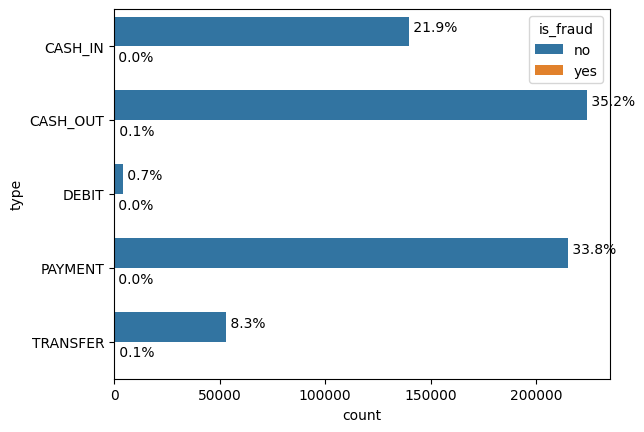

In [28]:
# Complete transiction type
ax = sns.countplot(y='type', hue='is_fraud', data=df4)

total = df4['type'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

H4 Values greater than 100.000 occours using transfers-type method.
FALSE: The majority transactions occours in trasnfer-type, however transactions greater than 100.000 occour in cash-out and cash-in too.

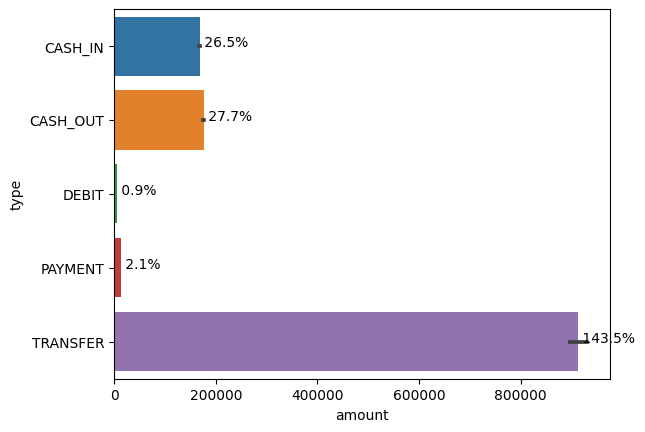

In [29]:
ax = sns.barplot(y='type', x='amount', data=df4);

total = df4['type'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

H5 Fraud transactions occours at least in 3 days.
TRUE: The values for transactions and days in fraud aren't similar.

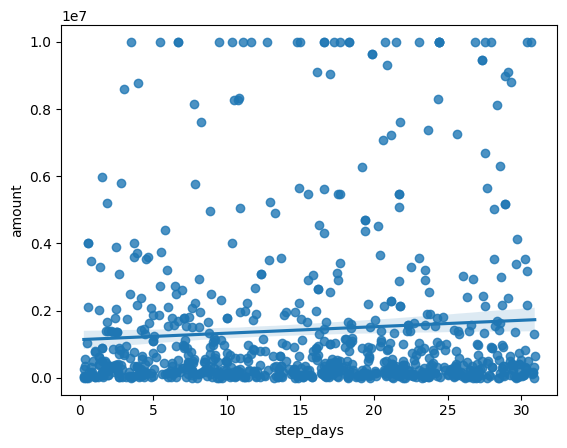

In [30]:
aux1 = df4[df4['is_fraud'] == 'yes']
sns.regplot(x='step_days', y='amount', data=aux1);

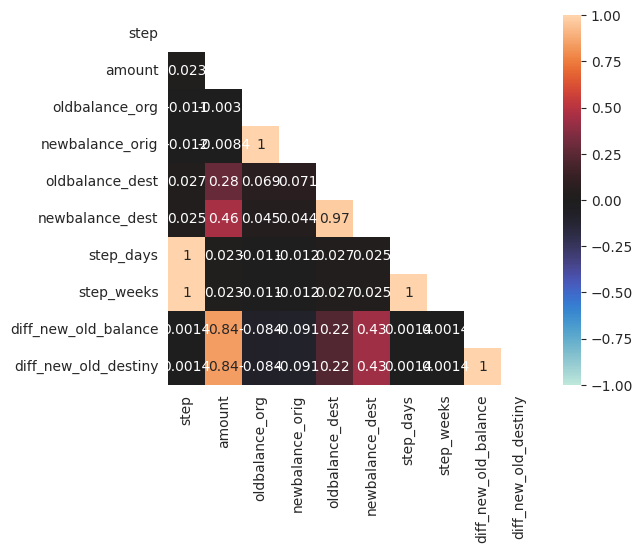

In [31]:
corr = num_attributes.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, annot=True, mask=mask, vmin=-1, center=0, vmax=1, square=True)

In [32]:
def calcCramerV(x, y):
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape

    chi2 = stats.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))

    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)

    return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))

In [33]:

dict_corr = {}
columns = cat_attributes.columns.tolist()

for column in columns:
    dict_corr[column] = {}

    for column2 in columns:
        dict_corr[column][column2] = calcCramerV(cat_attributes[column], cat_attributes[column2])

corr = pd.DataFrame(dict_corr)

<ipython-input-32-e965ee0a775a>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))
<ipython-input-32-e965ee0a775a>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))
<ipython-input-32-e965ee0a775a>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))
<ipython-input-32-e965ee0a775a>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))
<ipython-input-32-e965ee0a775a>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))
<ipython-input-32-e965ee0a775a>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))
<ipython-input-32-e965ee0a775a>:12: RuntimeWarning: invalid value encountered in d

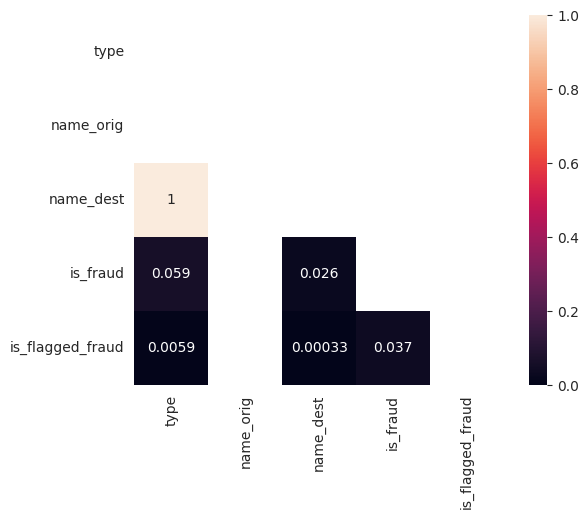

In [34]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, annot=True, mask=mask, vmin=0, vmax=1, square=True)

In [35]:
df5 = df4.copy()

Spliting into Train, Valid and Test

In [36]:
X = df5.drop(columns=['is_fraud', 'is_flagged_fraud', 'name_orig', 'name_dest',
                      'step_weeks', 'step_days'], axis=1)
y = df5['is_fraud'].map({'yes': 1, 'no': 0})

In [39]:
X.head()

,step,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,diff_new_old_balance,diff_new_old_destiny
0,283,CASH_IN,210329.84,3778062.79,3988392.64,1519266.60,1308936.76,-210329.84,-210329.84
1,132,CASH_OUT,215489.19,21518.00,0.00,6345756.55,6794954.89,449198.34,449198.34
2,355,DEBIT,4431.05,20674.00,16242.95,80876.56,85307.61,4431.05,4431.05
3,135,CASH_OUT,214026.20,46909.73,0.00,13467450.36,13681476.56,214026.20,214026.20
4,381,CASH_OUT,8858.45,0.00,0.00,1667180.58,1676039.03,8858.45,8858.45


In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [ ]:
3778062.79
3988392.64
1308936.76
-210329.84
-210329.84


In [41]:
# spliting into temp and test
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=.2, stratify=y)

In [42]:
# spliting into train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=.2, stratify=y_temp)

In [47]:
!pip install category_encoders



In [49]:
X.head(2)

,step,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,diff_new_old_balance,diff_new_old_destiny
0,283,CASH_IN,210329.84,3778062.79,3988392.64,1519266.60,1308936.76,-210329.84,-210329.84
1,132,CASH_OUT,215489.19,21518.00,0.00,6345756.55,6794954.89,449198.34,449198.34


In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407207 entries, 624502 to 557627
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   step                  407207 non-null  int64  
 1   type_TRANSFER         407207 non-null  int64  
 2   type_CASH_OUT         407207 non-null  int64  
 3   type_CASH_IN          407207 non-null  int64  
 4   type_PAYMENT          407207 non-null  int64  
 5   type_DEBIT            407207 non-null  int64  
 6   amount                407207 non-null  float64
 7   oldbalance_org        407207 non-null  float64
 8   newbalance_orig       407207 non-null  float64
 9   oldbalance_dest       407207 non-null  float64
 10  newbalance_dest       407207 non-null  float64
 11  diff_new_old_balance  407207 non-null  float64
 12  diff_new_old_destiny  407207 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 43.5 MB


In [101]:
# Check unique values and their counts in the 'type_TRANSFER' column
unique_values = data_df['type_TRANSFER'].value_counts()
print(unique_values)


1    1
Name: type_TRANSFER, dtype: int64


In [50]:
if 'type' in X_train.columns:
    print("'type' column is present in X_train")
else:
    print("'type' column is not present in X_train")


'type' column is not present in X_train


In [53]:
# Check if the columns related to 'type' exist in X_train
type_columns = ['type_TRANSFER', 'type_CASH_OUT', 'type_CASH_IN', 'type_PAYMENT', 'type_DEBIT']

if all(col in X_train.columns for col in type_columns):
    print("Columns related to 'type' are present in X_train")
else:
    print("Columns related to 'type' are not present in X_train")


Columns related to 'type' are present in X_train


In [ ]:
#One Hot Encoder
from category_encoders import OneHotEncoder
ohe = OneHotEncoder(cols=['type'], use_cat_names=True)

X_train = ohe.fit_transform(X_train)
X_valid = ohe.transform(X_valid)

X_temp = ohe.fit_transform(X_temp)
X_test = ohe.transform(X_test)

In [54]:
#Rescalling
from sklearn.preprocessing import MinMaxScaler
num_columns = ['amount', 'oldbalance_org', 'newbalance_orig', 'oldbalance_dest', 'newbalance_dest',
               'diff_new_old_balance', 'diff_new_old_destiny']
mm = MinMaxScaler()
X_params = X_temp.copy()

X_train[num_columns] = mm.fit_transform(X_train[num_columns])
X_valid[num_columns] = mm.transform(X_valid[num_columns])

X_params[num_columns] = mm.fit_transform(X_temp[num_columns])
X_test[num_columns] = mm.transform(X_test[num_columns])


In [55]:
final_columns_selected = ['step', 'oldbalance_org',
                          'newbalance_orig', 'newbalance_dest',
                          'diff_new_old_balance', 'diff_new_old_destiny',
                          'type_TRANSFER']

In [56]:
X_train_cs = X_train[final_columns_selected]
X_valid_cs = X_valid[final_columns_selected]

X_temp_cs = X_temp[final_columns_selected]
X_test_cs = X_test[final_columns_selected]


X_params_cs = X_params[final_columns_selected]

In [57]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
dummy = DummyClassifier()
dummy.fit(X_train_cs, y_train)

y_pred = dummy.predict(X_valid_cs)

In [58]:
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
def ml_scores(model_name, y_true, y_pred):

    accuracy = balanced_accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)

    return pd.DataFrame({'Balanced Accuracy': np.round(accuracy, 3),
                         'Precision': np.round(precision, 3),
                         'Recall': np.round(recall, 3),
                         'F1': np.round(f1, 3),
                         'Kappa': np.round(kappa, 3)},
                        index=[model_name])

In [59]:
dummy_results = ml_scores('dummy', y_valid, y_pred)
dummy_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Balanced Accuracy,Precision,Recall,F1,Kappa
dummy,0.5,0.0,0.0,0.0,0.0


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101671
           1       0.00      0.00      0.00       131

    accuracy                           1.00    101802
   macro avg       0.50      0.50      0.50    101802
weighted avg       1.00      1.00      1.00    101802



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#1. Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train_cs, y_train)

y_pred = lg.predict(X_valid_cs)

In [62]:
lg_results = ml_scores('Logistic Regression', y_valid, y_pred)
lg_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Balanced Accuracy,Precision,Recall,F1,Kappa
Logistic Regression,0.5,0.0,0.0,0.0,0.0


In [63]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101671
           1       0.00      0.00      0.00       131

    accuracy                           1.00    101802
   macro avg       0.50      0.50      0.50    101802
weighted avg       1.00      1.00      1.00    101802



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
def ml_cv_results(model_name, model, x, y, verbose=1):

    '''initial'''
    balanced_accuracies = []
    precisions = []
    recalls = []
    f1s = []
    kappas = []

    mm = MinMaxScaler()

    x_ = x.to_numpy()
    y_ = y.to_numpy()

    count = 0

    '''cross-validation'''
    skf = StratifiedKFold(n_splits=5, shuffle=True)

    for index_train, index_test in skf.split(x_, y_):
        ## Showing the Fold
        if verbose > 0:
            count += 1
            print('Fold K=%i' % (count))

        ## selecting train and test
        x_train, x_test = x.iloc[index_train], x.iloc[index_test]
        y_train, y_test = y.iloc[index_train], y.iloc[index_test]

        ## applying the scale
        x_train = mm.fit_transform(x_train)
        x_test = mm.transform(x_test)

        ## training the model
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        ## saving the metrics
        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        kappas.append(cohen_kappa_score(y_test, y_pred))


    '''results'''
    accuracy_mean, accuracy_std = np.round(np.mean(balanced_accuracies), 3), np.round(np.std(balanced_accuracies), 3)
    precision_mean, precision_std = np.round(np.mean(precisions), 3), np.round(np.std(precisions), 3)
    recall_mean, recall_std = np.round(np.mean(recalls), 3), np.round(np.std(recalls), 3)
    f1_mean, f1_std = np.round(np.mean(f1s), 3), np.round(np.std(f1s), 3)
    kappa_mean, kappa_std = np.round(np.mean(kappas), 3), np.round(np.std(kappas), 3)

    ## saving the results in a dataframe
    return pd.DataFrame({"Balanced Accuracy": "{} +/- {}".format(accuracy_mean, accuracy_std),
                        "Precision": "{} +/- {}".format(precision_mean, precision_std),
                        "Recall": "{} +/- {}".format(recall_mean, recall_std),
                        "F1": "{} +/- {}".format(f1_mean, f1_std),
                        "Kappa": "{} +/- {}".format(kappa_mean, kappa_std)},
                       index=[model_name])

In [69]:
from sklearn.model_selection import StratifiedKFold
lg_cv = ml_cv_results('Logistic Regression',
                      LogisticRegression(),
                      X_temp_cs, y_temp)
lg_cv


Fold K=1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold K=2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold K=3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold K=4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold K=5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Balanced Accuracy,Precision,Recall,F1,Kappa
Logistic Regression,0.5 +/- 0.0,0.0 +/- 0.0,0.0 +/- 0.0,0.0 +/- 0.0,0.0 +/- 0.0


# 2. Random Forest


In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_cs, y_train)

y_pred = rf.predict(X_valid_cs)

In [65]:
rf_results = ml_scores('Random Forest', y_valid, y_pred)
rf_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
Random Forest,0.866,0.97,0.733,0.835,0.835


In [70]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101671
           1       0.97      0.73      0.83       131

    accuracy                           1.00    101802
   macro avg       0.98      0.87      0.92    101802
weighted avg       1.00      1.00      1.00    101802



In [71]:
rf_cv = ml_cv_results('Random Forest',
                      RandomForestClassifier(),
                      X_temp_cs, y_temp)
rf_cv

Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Kappa
Random Forest,0.868 +/- 0.017,0.974 +/- 0.01,0.737 +/- 0.034,0.838 +/- 0.023,0.838 +/- 0.023


#3. XGBoost

In [72]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_cs, y_train)

y_pred = xgb.predict(X_valid_cs)

In [73]:
xgb_results = ml_scores('XGBoost', y_valid, y_pred)
xgb_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
XGBoost,0.897,0.929,0.794,0.856,0.856


In [74]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101671
           1       0.93      0.79      0.86       131

    accuracy                           1.00    101802
   macro avg       0.96      0.90      0.93    101802
weighted avg       1.00      1.00      1.00    101802



In [75]:
xgb_cv = ml_cv_results('XGBoost', XGBClassifier(),
                       X_temp_cs, y_temp)
xgb_cv

Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Kappa
XGBoost,0.877 +/- 0.011,0.949 +/- 0.02,0.755 +/- 0.023,0.841 +/- 0.018,0.84 +/- 0.018


# Comparing model's performance

In [76]:
modeling_performance = pd.concat([dummy_results, lg_results,
                                  rf_results, xgb_results,
                                 ])
modeling_performance.sort_values(by="F1", ascending=True)

,Balanced Accuracy,Precision,Recall,F1,Kappa
dummy,0.500,0.000,0.000,0.000,0.000
Logistic Regression,0.500,0.000,0.000,0.000,0.000
Random Forest,0.866,0.970,0.733,0.835,0.835
XGBoost,0.897,0.929,0.794,0.856,0.856


# Hyperpapramerter Fine Tuning

In [81]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
f1 = make_scorer(f1_score)

In [82]:
'''params = {
    'booster': ['gbtree', 'gblinear', 'dart'],
    'eta': [0.3, 0.1, 0.01],
    'scale_pos_weight': [1, 774, 508, 99]
}

In [ ]:
'''gs = GridSearchCV(XGBClassifier(),
                  param_grid=params,
                  scoring=f1,
                  cv=StratifiedKFold(n_splits=5))

gs.fit(X_params_cs, y_temp)

In [84]:
from xgboost import XGBClassifier

# XGBoost classifier without specifying parameters (uses defaults)
xgb_default = XGBClassifier()

# Train the model on your training data
xgb_default.fit(X_train_cs, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [95]:
X_train_cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407207 entries, 624502 to 557627
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   step                  407207 non-null  int64  
 1   oldbalance_org        407207 non-null  float64
 2   newbalance_orig       407207 non-null  float64
 3   newbalance_dest       407207 non-null  float64
 4   diff_new_old_balance  407207 non-null  float64
 5   diff_new_old_destiny  407207 non-null  float64
 6   type_TRANSFER         407207 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 24.9 MB


In [96]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 407207 entries, 624502 to 557627
Series name: is_fraud
Non-Null Count   Dtype
--------------   -----
407207 non-null  int64
dtypes: int64(1)
memory usage: 6.2 MB


In [86]:
from sklearn.metrics import accuracy_score

y_pred = xgb_default.predict(X_valid_cs)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy on validation set: {accuracy}")


Accuracy on validation set: 0.9996561953596197


In [87]:
xgb_gs_results = ml_scores('XGBoost GS', y_valid, y_pred)
xgb_gs_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
XGBoost GS,0.897,0.929,0.794,0.856,0.856


In [89]:
xgb_gs_cv = ml_cv_results('XGBoost GS', xgb_default, X_temp_cs, y_temp)
xgb_gs_cv


Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Kappa
XGBoost GS,0.885 +/- 0.016,0.962 +/- 0.012,0.77 +/- 0.032,0.855 +/- 0.02,0.855 +/- 0.02


In [90]:
y_pred = xgb_default.predict(X_test_cs)


In [91]:
unseen_scores = ml_scores('unseen', y_test, y_pred)
unseen_scores

,Balanced Accuracy,Precision,Recall,F1,Kappa
unseen,0.89,0.587,0.78,0.67,0.67


 #Model's Performance
 1. What is the model's Precision and Accuracy?

In [92]:
print('For unseen data, the values of balanced accuracy is equal %.2f and precision is equal %.2f.' % (unseen_scores['Balanced Accuracy'], unseen_scores['Precision']))


For unseen data, the values of balanced accuracy is equal 0.89 and precision is equal 0.59.


In [93]:
print('The model can detect 0.851 +/- 0.023 of the fraud. However it detected 0.84 of the frauds from a unseen data.')


The model can detect 0.851 +/- 0.023 of the fraud. However it detected 0.84 of the frauds from a unseen data.


In [94]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407207 entries, 624502 to 557627
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   step                  407207 non-null  int64  
 1   type_TRANSFER         407207 non-null  int64  
 2   type_CASH_OUT         407207 non-null  int64  
 3   type_CASH_IN          407207 non-null  int64  
 4   type_PAYMENT          407207 non-null  int64  
 5   type_DEBIT            407207 non-null  int64  
 6   amount                407207 non-null  float64
 7   oldbalance_org        407207 non-null  float64
 8   newbalance_orig       407207 non-null  float64
 9   oldbalance_dest       407207 non-null  float64
 10  newbalance_dest       407207 non-null  float64
 11  diff_new_old_balance  407207 non-null  float64
 12  diff_new_old_destiny  407207 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 43.5 MB


In [122]:
data_point = {
    'step': 492,
    'oldbalance_org': 1059682.92,
    'newbalance_orig': 110.0,
    'newbalance_dest': 0.0,
    'diff_new_old_balance': 1000.0,
    'diff_new_old_destiny': 0.0,
    'type_TRANSFER': 1
}






data_df = pd.DataFrame([data_point])


prediction = xgb_default.predict(data_df)

mapping = {1: 'Yes', 0: 'No'}

# Convert prediction to 'Yes' or 'No'
predicted_fraud = mapping.get(prediction[0], 'Unknown')

print("Predicted Fraud:", predicted_fraud)



Predicted Fraud: Yes
